# RC Circuit (SKP)

RC circuit with DC source:

* For charging,
$$ iR + \frac{q}{C} = V $$
$$\implies \frac{dq}{dt} = -\frac{q - CV}{RC} $$

* For discharging,
$$ iR + \frac{q}{C} = 0 $$
$$ \implies \frac{dq}{dt} = -\frac{q}{RC} $$

RC circuit with AC source:

* For charging,
$$ iR + \frac{q}{C} = V_0\sin(\omega t) $$
$$ \implies \frac{dq}{dt} = -\frac{q - CV_0\sin(\omega t)}{RC} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

## RC circuit with DC source

**(find problem in using `solve_ivp`)**

### Charging
For charging,
$$ iR + \frac{q}{C} = V $$
$$\implies \frac{dq}{dt} = -\frac{q - CV}{RC} $$

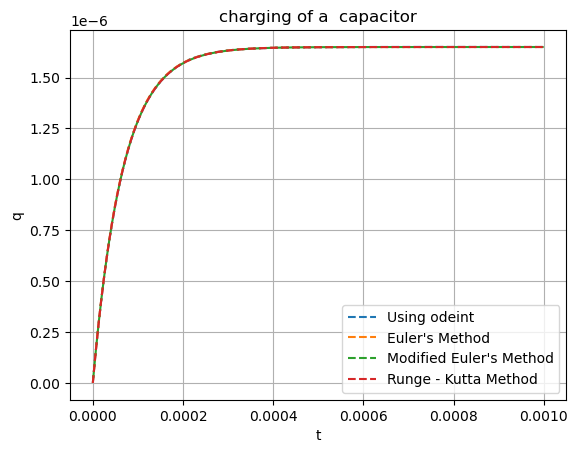

In [2]:
V = 5         # dc voltage in Volts
R = 200       # resistance in ohm
C = 0.33e-6   # capacitance in F

# Write the differential equation (x=t, y=q).
def dydx(x,y):
    return -(y - C*V)/(R*C)

x_0, y_0 = 0, 0       # initial condition
x_min, x_max = x_0, 1e-3   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')
'''
# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')
'''
# Euler's Method 
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('q')
plt.title('charging of a  capacitor')
plt.legend()
plt.grid()
plt.show()

### Discharging
For discharging,
$$ iR + \frac{q}{C} = 0 $$
$$ \implies \frac{dq}{dt} = -\frac{q}{RC} $$

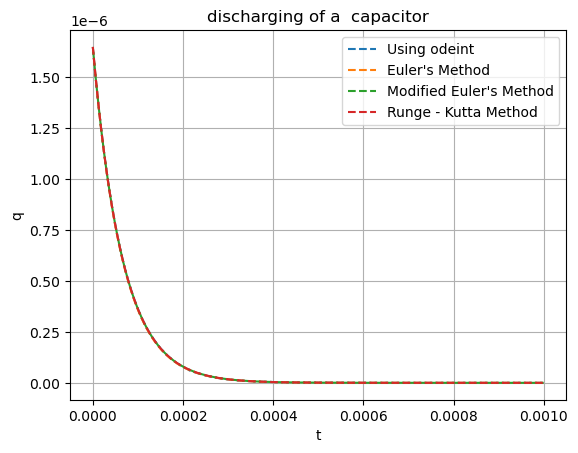

In [3]:
V = 5         # dc voltage (off) in Volts
R = 200       # resistance in ohm
C = 0.33e-6   # capacitance in F
q0 = V*C  # initial charge

# Write the differential equation (x=t, y=q).
def dydx(x,y):
    return -(y)/(R*C)

x_0, y_0 = 0, q0       # initial condition
x_min, x_max = x_0, 1e-3   # lower and upper limit of x
dx = (x_max-x_0)/1000    # infinitesimal length

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')
'''
# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')
'''
# Euler's Method 
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('q')
plt.title('discharging of a  capacitor')
plt.legend()
plt.grid()
plt.show()

## RC circuit with AC source
**problem in using solve_ivp**

### Charging
For charging,
$$ iR + \frac{q}{C} = V_0\sin(\omega t) $$
$$ \implies \frac{dq}{dt} = -\frac{q - CV_0\sin(\omega t)}{RC} $$

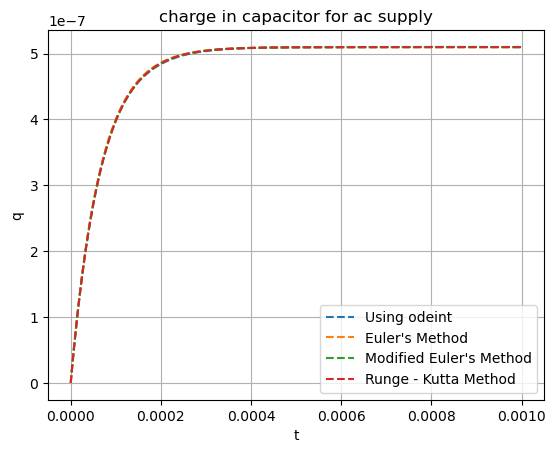

In [4]:
w = 2*np.pi*50
V0 = 5
V = V0*np.sin(w*x)       # ac voltage in Volts
R = 200       # resistance in ohm
C = 0.33e-6   # capacitance in F

# Write the differential equation (x=t, y=q).
def dydx(x,y):
    return -(y - C*V)/(R*C)

x_0, y_0 = 0, 0       # initial condition
x_min, x_max = x_0, 1e-3   # lower and upper limit of x
dx = (x_max-x_0)/500    # infinitesimal length

# Using odeint
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = odeint(dydx, y0=y0, t=x, tfirst=True)
y1 = sol.T[0]
plt.plot(x,y1, '--', label='Using odeint')
'''
# Using solve_ivp
y0 = y_0
x = np.linspace(x_min, x_max,500)
sol = solve_ivp(dydx, t_span=(min(x), max(x)), y0=[y0], t_eval=x)
y1 = sol.y[0]
plt.plot(x,y1, '--', label='Using solve_ivp')
'''
# Euler's Method 
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x)
    yy.append(y)
    x += h
    y += h*dydx(x,y)
plt.plot(xx,yy, '--', label='Euler\'s Method')

# Modified Euler's Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    x += h
    dy = (h/2)*(dydx(x,y) + dydx(x + h, y + h*dydx(x,y)))
    y += dy
    xx.append(x), yy.append(y)
plt.plot(xx,yy, '--', label='Modified Euler\'s Method')

# Runge - Kutta Method
x, y = x_0, y_0
xmax = x_max
h = dx
xx, yy = [], []
while abs(x) < abs(xmax):
    xx.append(x), yy.append(y)
    x += h
    k1 = h * dydx(x,y)
    k2 = h * dydx(x + (h/2), y + (k1/2))
    k3 = h * dydx(x + (h/2), y + (k2/2))
    k4 = h * dydx(x + h, y + k3)
    y += (1/6)*(k1 + 2*(k2 + k3) + k4)
plt.plot(xx,yy, '--', label='Runge - Kutta Method')

plt.xlabel('t')
plt.ylabel('q')
plt.title('charge in capacitor for ac supply')
plt.legend()
plt.grid()
plt.show()

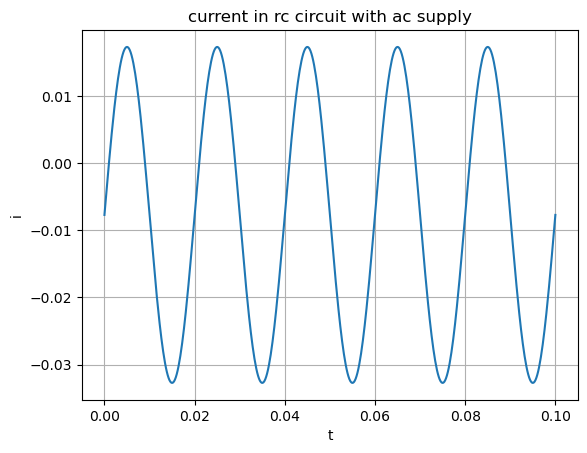

In [5]:
x_min, x_max = x_0, 1e-1   # lower and upper limit of x
x = np.linspace(x_min, x_max,500)

w = 2*np.pi*50
V0 = 5
V = V0*np.sin(w*x)     # ac voltage in Volts
R = 200       # resistance in ohm
C = 0.33e-6   # capacitance in F

def i(x,y):
    return -(y - C*V)/(R*C)

plt.plot(x,i(x,y))
plt.title('current in rc circuit with ac supply')
plt.xlabel('t')
plt.ylabel('i')
plt.grid()
plt.show()